In [ ]:
!pip install pystan~=2.14
!pip install fbprophet


import numpy as np
import pandas as pd
import os
from google.colab import drive
import matplotlib.pyplot as plt
import pandas as pd
from fbprophet import Prophet
from matplotlib import pyplot as plt




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62.6 MB 75 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.7 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6750696 sha256=73ba7a39596d55f949ddfdfbbcb50a9e913b5af1055120b2329be881f4e53ccd
  Stored in directory: /root/.cache/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
ERROR: pip's dependency resolver does not currently take into account all the p

In [ ]:
drive.mount('/content/drive')
combine_cancel = pd.read_csv('/content/drive/Shareddrives/IND708/final_forecasting.csv')

Mounted at /content/drive


In [ ]:
combine_cancel.head()

,Unnamed: 0,FlightDate,Month,Cancelled,Unnamed: 0.1,Unnamed: 0.1.1
0,23,2018-01-17,1,True,NaN,NaN
1,49,2018-01-12,1,True,NaN,NaN
2,54,2018-01-17,1,True,NaN,NaN
3,101,2018-01-04,1,True,NaN,NaN
4,128,2018-01-04,1,True,NaN,NaN


8939


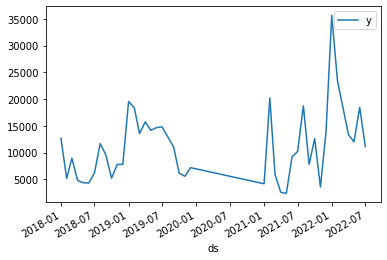

In [ ]:
from numpy.lib.function_base import append
combine_cancel['Year'] = combine_cancel['FlightDate'].apply(lambda x: str(x)[:-6])
combine_cancel['Month'] = combine_cancel['FlightDate'].apply(lambda x: str(x)[-5:-3])
combine_cancel['ds'] =pd.DatetimeIndex(combine_cancel['Year']+'-'+combine_cancel['Month'])
ds_1=[]
count=[]
h=1
n=combine_cancel['ds']
##combine_cancel['Month'] = combine_cancel['Month'].astype(int)
##combine_cancel['Year'] = combine_cancel['Year'].astype(int)
print(sum((combine_cancel['Month']== '03') & (combine_cancel['Year'] == '2018')))

for i in range(0, len(n)-1):
    if n[i ] != n[i+1]:
      ds_1.append(n[i])
      count.append(h)
      h=1
    else:
      h=h+1
      

data= {'ds':ds_1,'y':count}
df = pd.DataFrame(data)
df.sort_values(by='ds', inplace=True)

df = df.reset_index(drop=True)

df.head()
df.plot(x ='ds', y='y', kind='line')

In [ ]:
model = Prophet(interval_width=0.95)
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future_dates = model.make_future_dataframe(periods=12, freq='MS')
future_dates.head()


,ds
0,2018-01-01
1,2018-02-01
2,2018-03-01
3,2018-04-01
4,2018-05-01


In [ ]:
forecast =model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2018-01-01,15229.650127,6628.868993,24207.826413
1,2018-02-01,14015.984113,5785.488245,22876.797425
2,2018-03-01,7570.628213,-1010.026130,15988.888440
3,2018-04-01,6301.378028,-2480.729518,15681.374353
4,2018-05-01,5409.288081,-3138.070354,14488.181479


Text(47.625, 0.5, 'Number of Cancelled Flights')

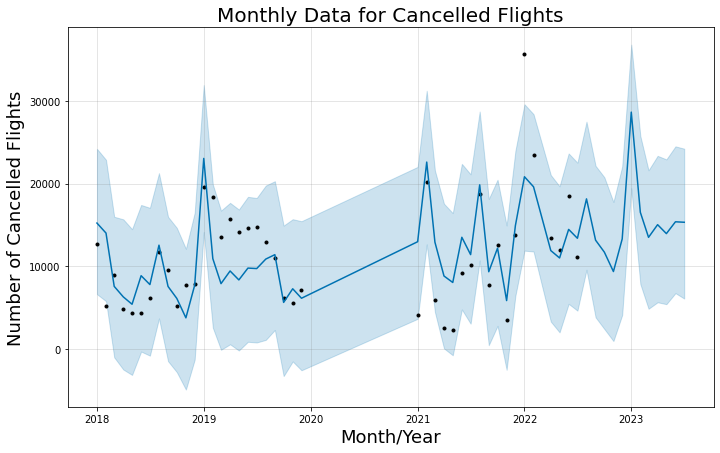

In [ ]:
#Creating a graph to represent the data while also editting the titles
figure_1 = model.plot(forecast, uncertainty=True, xlabel='Date', ylabel='Value')
g = figure_1.gca()
g.set_title("Monthly Data for Cancelled Flights", size=20)
g.set_xlabel("Month/Year", size=18)
g.set_ylabel("Number of Cancelled Flights", size=18)